In [3]:
!pip install matplotlib

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the image
image_path = 'test.jpg'
image = tf.image.decode_image(tf.io.read_file(image_path))
image = tf.image.resize(image, [513, 513])
image = image / 255.0  # Normalize to [0, 1]

# Check if the image is 3-channel RGB
if image.shape[-1] != 3:
    print("Make sure your image is RGB.")

# Expand dimensions for batch
image_batch = tf.expand_dims(image, 0)

# 2. Load the model
m = hub.KerasLayer('https://tfhub.dev/google/seefood/segmenter/mobile_food_segmenter_V1/1')

# 3. Use the model
results = m(image_batch, training=False)
segmentation_probs = results[0][0]
segmentation_mask = results[1][0]

# 4. Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title('Segmentation Mask')

plt.subplot(1, 3, 3)
# Overlay the segmentation mask on the original image
class_id = 5
overlay = np.where(segmentation_mask == class_id, 1, 0)
plt.imshow(image)
plt.imshow(overlay, alpha=0.5)
plt.title(f'Overlay (for class {class_id})')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the image
image_path = 'test.jpg'
image = tf.image.decode_image(tf.io.read_file(image_path))
image = tf.image.resize(image, [513, 513])
image = image / 255.0  # Normalize to [0, 1]

# Check if the image is 3-channel RGB
if image.shape[-1] != 3:
    print("Make sure your image is RGB.")

# Expand dimensions for batch
image_batch = tf.expand_dims(image, 0)

# 2. Load the model with specified output keys
model_url = 'https://tfhub.dev/google/seefood/segmenter/mobile_food_segmenter_V1/1'
m = hub.KerasLayer(model_url, signature_outputs_as_dict=True)

# 3. Use the model
results = m(image_batch)

segmentation_probs = results['food_group_segmenter:semantic_probabilities'][0]
segmentation_mask = results['food_group_segmenter:semantic_predictions'][0]

# 4. Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title('Segmentation Mask')

plt.subplot(1, 3, 3)
# Overlay the segmentation mask on the original image
class_id = 5
overlay = np.where(segmentation_mask == class_id, 1, 0)
plt.imshow(image)
plt.imshow(overlay, alpha=0.5)
plt.title(f'Overlay (for class {class_id})')

plt.tight_layout()
plt.show()


Offline Version

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import os

# Extract the tar.gz model
model_filename = 'seefood_segmenter_mobile_food_segmenter_V1_1.tar.gz'
extracted_folder_path = 'extracted_model'

if not os.path.exists(extracted_folder_path):
    with tarfile.open(model_filename, 'r:gz') as tar:
        tar.extractall(path=extracted_folder_path)

# 1. Load the image
image_path = 'food5.jpg'
image = tf.image.decode_image(tf.io.read_file(image_path))
image = tf.image.resize(image, [513, 513])
image = image / 255.0  # Normalize to [0, 1]

# Check if the image is 3-channel RGB
if image.shape[-1] != 3:
    print("Make sure your image is RGB.")

# Expand dimensions for batch
image_batch = tf.expand_dims(image, 0)

# 2. Load the local model with specified output keys
m = hub.KerasLayer(extracted_folder_path, signature_outputs_as_dict=True)

# 3. Use the model
results = m(image_batch)

segmentation_probs = results['food_group_segmenter:semantic_probabilities'][0]
segmentation_mask = results['food_group_segmenter:semantic_predictions'][0]

# 4. Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title('Segmentation Mask')

plt.subplot(1, 3, 3)
# Overlay the segmentation mask on the original image
class_id = 5
overlay = np.where(segmentation_mask == class_id, 1, 0)
plt.imshow(image)
plt.imshow(overlay, alpha=0.5)
plt.title(f'Overlay (for class {class_id})')

plt.tight_layout()
plt.show()


ColorMap

In [5]:
!pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/90.3 kB ? eta -:--:--
   ---------------------------------------- 90.3/90.3 kB 2.6 MB/s eta 0:00:00


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


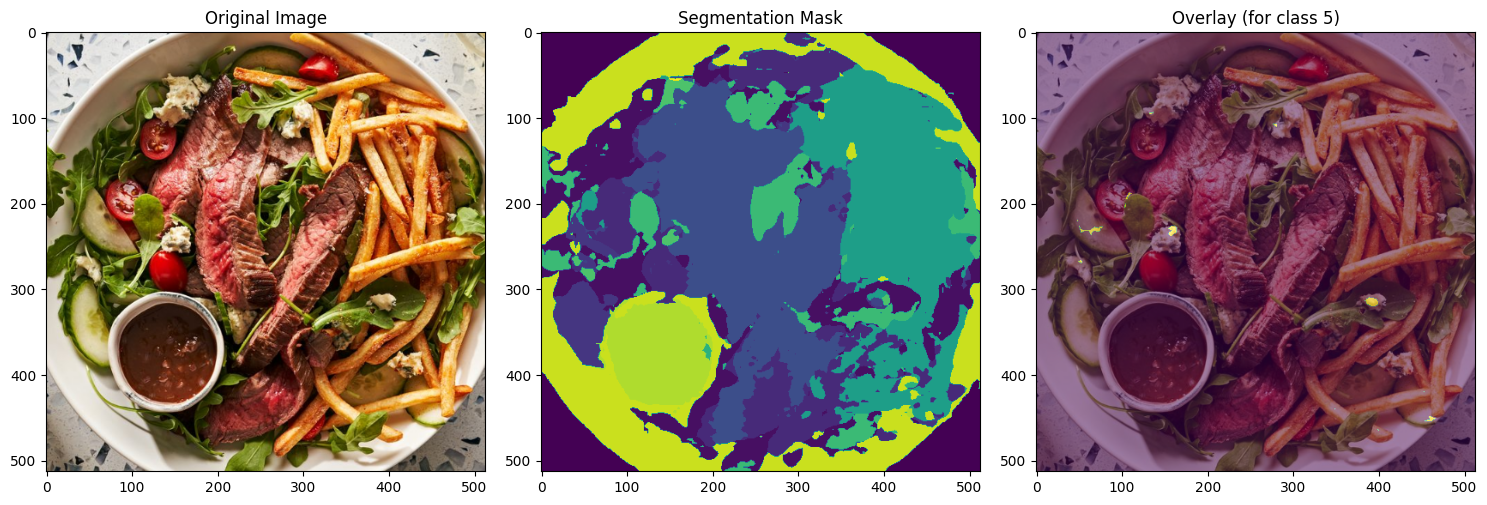

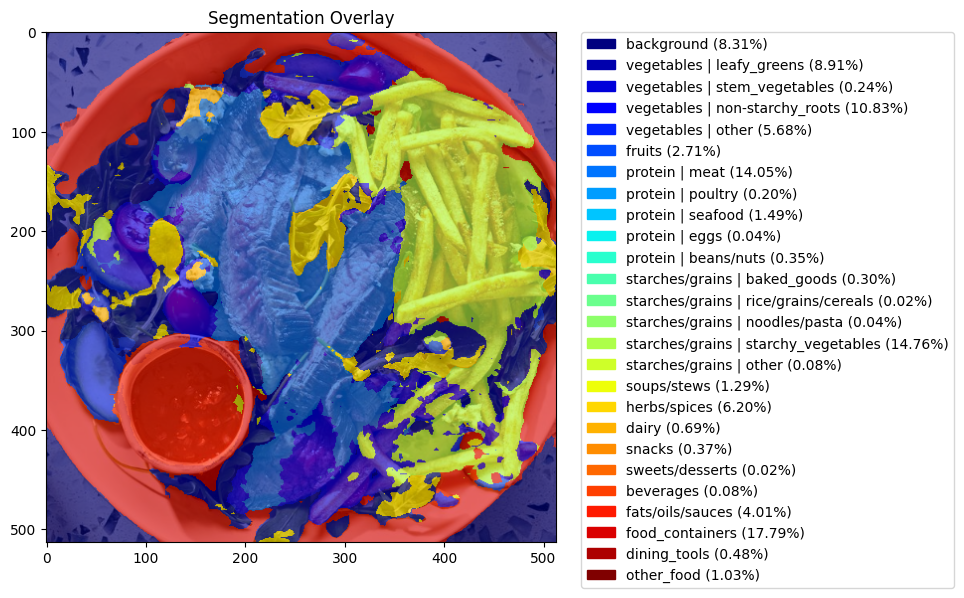

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import os
import pandas as pd
import matplotlib.patches as mpatches

# Extract the tar.gz model
model_filename = 'seefood_segmenter_mobile_food_segmenter_V1_1.tar.gz'
extracted_folder_path = 'extracted_model'

if not os.path.exists(extracted_folder_path):
    with tarfile.open(model_filename, 'r:gz') as tar:
        tar.extractall(path=extracted_folder_path)

# 1. Load the image
# image_path = 'test.jpg'
image_path = 'food5.jpg'
image = tf.image.decode_image(tf.io.read_file(image_path))
image = tf.image.resize(image, [513, 513])
image = image / 255.0  # Normalize to [0, 1]

# Check if the image is 3-channel RGB
if image.shape[-1] != 3:
    print("Make sure your image is RGB.")

# Expand dimensions for batch
image_batch = tf.expand_dims(image, 0)

# 2. Load the local model with specified output keys
m = hub.KerasLayer(extracted_folder_path, signature_outputs_as_dict=True)

# 3. Use the model
results = m(image_batch)

segmentation_probs = results['food_group_segmenter:semantic_probabilities'][0]
segmentation_mask = results['food_group_segmenter:semantic_predictions'][0]

# 4. Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title('Segmentation Mask')

plt.subplot(1, 3, 3)
# Overlay the segmentation mask on the original image
class_id = 5
overlay = np.where(segmentation_mask == class_id, 1, 0)
plt.imshow(image)
plt.imshow(overlay, alpha=0.5)
plt.title(f'Overlay (for class {class_id})')

plt.tight_layout()
plt.show()

# 5. Load class labels from CSV file

labels_csv_path = os.path.join('labelmap.csv')
labels_df = pd.read_csv(labels_csv_path)
# Assuming the CSV has 'id' and 'name' columns
class_names = labels_df.sort_values('id')['name'].tolist()

# Create a colormap for visualization
colors = plt.cm.jet(np.linspace(0, 1, len(class_names)))

colored_mask = np.zeros((segmentation_mask.shape[0], segmentation_mask.shape[1], 3))

# Calculate the average probability for each class
avg_probabilities = np.mean(segmentation_probs, axis=(0, 1))

for class_id, color in enumerate(colors):
    colored_mask[segmentation_mask == class_id] = color[:3]

# 6. Display the results
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.imshow(colored_mask, alpha=0.6)
plt.title('Segmentation Overlay')

# Create legend labels with probabilities
legend_labels = [f"{name} ({avg_prob:.2%})" for name, avg_prob in zip(class_names, avg_probabilities)]

# Legend for each class
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [8]:
#Remove Containter and Background

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


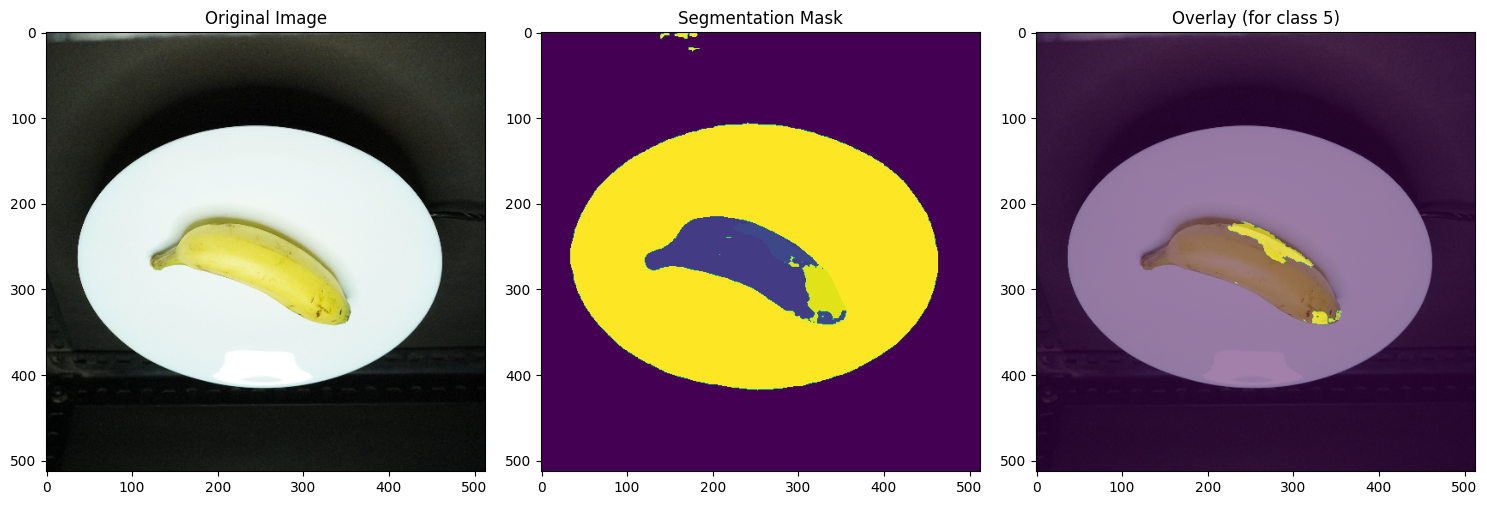

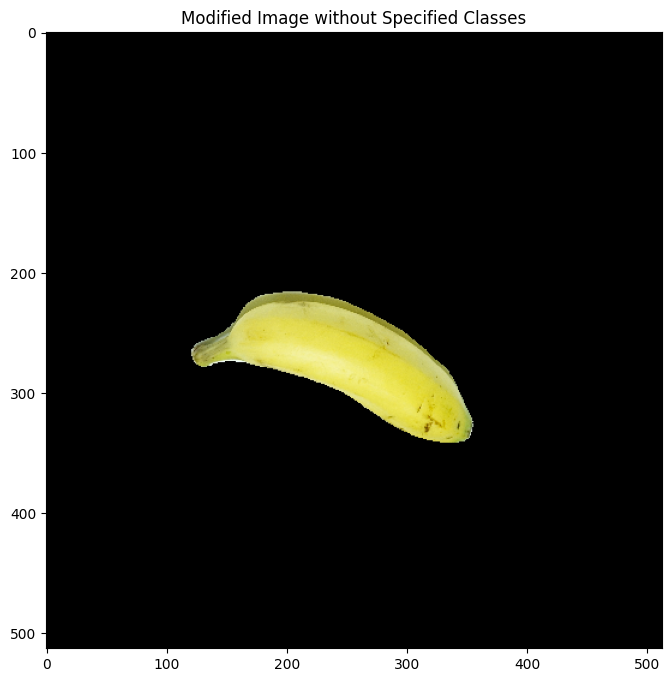

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import os
import pandas as pd
import matplotlib.patches as mpatches

# Extract the tar.gz model
model_filename = 'seefood_segmenter_mobile_food_segmenter_V1_1.tar.gz'
extracted_folder_path = 'extracted_model'

if not os.path.exists(extracted_folder_path):
    with tarfile.open(model_filename, 'r:gz') as tar:
        tar.extractall(path=extracted_folder_path)

# 1. Load the image
# image_path = 'test.jpg'
image_path = 'banana.jpg'
image = tf.image.decode_image(tf.io.read_file(image_path))
image = tf.image.resize(image, [513, 513])
image = image / 255.0  # Normalize to [0, 1]

# Check if the image is 3-channel RGB
if image.shape[-1] != 3:
    print("Make sure your image is RGB.")

# Expand dimensions for batch
image_batch = tf.expand_dims(image, 0)

# 2. Load the local model with specified output keys
m = hub.KerasLayer(extracted_folder_path, signature_outputs_as_dict=True)

# 3. Use the model
results = m(image_batch)

segmentation_probs = results['food_group_segmenter:semantic_probabilities'][0]
segmentation_mask = results['food_group_segmenter:semantic_predictions'][0]

# Define the label classes to remove (adjust as needed)
classes_to_remove = [0, 23, 24]  # Example: Remove classes 2, 4, and 6

# Create a mask to remove the specified classes
mask_to_remove = np.isin(segmentation_mask, classes_to_remove)

# Apply the mask to remove the corresponding regions from the original image
image_without_classes = image * (1 - mask_to_remove[..., tf.newaxis])  # Set to black (or any desired background color)

# 4. Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title('Segmentation Mask')

plt.subplot(1, 3, 3)
# Overlay the segmentation mask on the original image
class_id = 5
overlay = np.where(segmentation_mask == class_id, 1, 0)
plt.imshow(image)
plt.imshow(overlay, alpha=0.5)
plt.title(f'Overlay (for class {class_id})')

plt.tight_layout()
plt.show()

# Display the modified image without specified classes
plt.figure(figsize=(8, 8))
plt.imshow(image_without_classes.numpy())  # Convert to NumPy array for display
plt.title('Modified Image without Specified Classes')
plt.show()


Remove The Background of the depth images just as the Original Images 

In [13]:
MDE_path = 'MDE.jpg'
MDE_image = tf.image.decode_image(tf.io.read_file(MDE_path))
MDE_image = tf.image.resize(MDE_image, [513, 513])
MDE_image = MDE_image / 255.0  # Normalize to [0, 1]

# Assuming you have loaded the new image as 'new_image' (similar to loading the original image)

# 1. Apply the mask to the new image to remove the background
new_image_without_background = MDE_image * (1 - mask_to_remove[..., tf.newaxis])  # Set to black (or any desired background color)

# 2. Save the new image without the background
MDE_Masked_path = 'MDE_Masked.jpg'
tf.keras.preprocessing.image.save_img(MDE_Masked_path, new_image_without_background.numpy())  # Save the new image without the background


